In [3]:
import config as config
from src.dataset.bids import create_bids_dataset
from src.pipelines.p100_pipeline import P100AnalysisPipeline
import config as config
from bids import BIDSLayout

In [11]:
import pandas as pd
from glob import glob
import os

In [12]:
csv_dir = '/home/owaismujtaba/projects/article/p100_results'
csv_files = glob(os.path.join(csv_dir, "*.csv"))

# Load and concatenate all CSV files
all_dfs = [pd.read_csv(f) for f in csv_files]
combined_df = pd.concat(all_dfs, ignore_index=True)

# Save the result
output_path = os.path.join(csv_dir, "combined_p100_results.csv")
combined_df.to_csv(output_path, index=False)

print(f"Combined CSV saved to: {output_path}")

Combined CSV saved to: /home/owaismujtaba/projects/article/p100_results/combined_p100_results.csv


In [19]:
combined_df.columns

Index(['subject_id', 'session_id', 'condition', 'latency', 'peak', 'mean'], dtype='object')

/tmp/ipykernel_1326850/3332798405.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_avg, x='condition', y='peak', ax=axes[0], palette='Set3', width=0.5, boxprops=dict(alpha=0.7))
/tmp/ipykernel_1326850/3332798405.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_avg, x='condition', y='mean', ax=axes[1], palette='Set3', width=0.5, boxprops=dict(alpha=0.7))


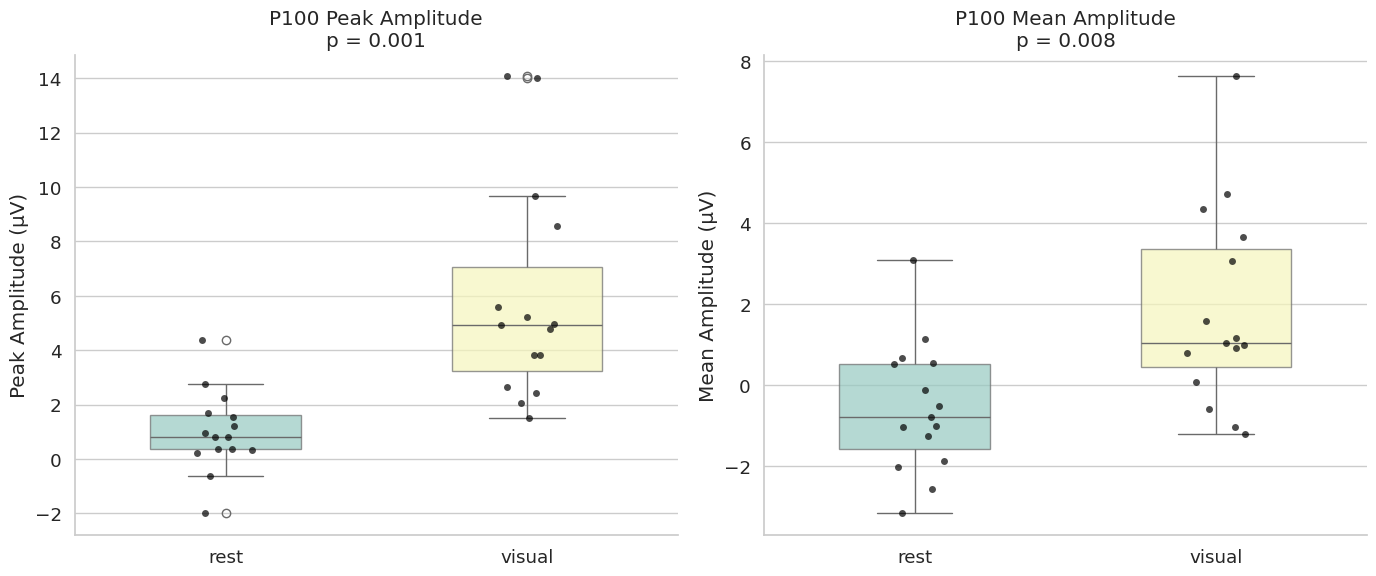

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Load data
df = pd.read_csv("p100_results/combined_p100_results.csv")

# Normalize condition names
df['condition'] = df['condition'].str.lower()

# Aggregate (mean) per subject and condition
df_avg = df.groupby(['subject_id', 'condition'], as_index=False).mean()

# Pivot for paired t-tests
peak_pivot = df_avg.pivot(index='subject_id', columns='condition', values='peak')
mean_pivot = df_avg.pivot(index='subject_id', columns='condition', values='mean')

# Paired t-tests
t_peak, p_peak = ttest_rel(peak_pivot['rest'], peak_pivot['visual'], nan_policy='omit')
t_mean, p_mean = ttest_rel(mean_pivot['rest'], mean_pivot['visual'], nan_policy='omit')

# Plot style
sns.set(style="whitegrid", font_scale=1.2)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Peak Amplitude
sns.boxplot(data=df_avg, x='condition', y='peak', ax=axes[0], palette='Set3', width=0.5, boxprops=dict(alpha=0.7))
sns.stripplot(data=df_avg, x='condition', y='peak', ax=axes[0], color='black', size=5, jitter=True, alpha=0.7)
axes[0].set_title(f"P100 Peak Amplitude\np = {p_peak:.3f}")
axes[0].set_ylabel("Peak Amplitude (µV)")
axes[0].set_xlabel("")
sns.despine(ax=axes[0])

# Plot 2: Mean Amplitude
sns.boxplot(data=df_avg, x='condition', y='mean', ax=axes[1], palette='Set3', width=0.5, boxprops=dict(alpha=0.7))
sns.stripplot(data=df_avg, x='condition', y='mean', ax=axes[1], color='black', size=5, jitter=True, alpha=0.7)
axes[1].set_title(f"P100 Mean Amplitude\np = {p_mean:.3f}")
axes[1].set_ylabel("Mean Amplitude (µV)")
axes[1].set_xlabel("")
sns.despine(ax=axes[1])

plt.tight_layout()
plt.savefig('p100_visual_rest.png', dpi=600)
